In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

output_path = 'C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/'
redwood_path_prefix = "redwood_output/"
guiana_path_prefix = "guiana_output/"

In [3]:
# Define a function to convert a string representation of a list to a list
def parse_list_string(list_string):
    return [float(item.strip()) if '.' in item and item != '-' else int(item.strip()) if item != '-' else None for item in list_string.split('-')]

def read_tree_data(tree_file_path):
    tree_data = {}

    with open(tree_file_path, 'r') as file:
        tree_index = None
        tree_values = {}
        for line in file:
            line = line.strip()
            if line.endswith(':'):
                # Start of a new tree index
                if tree_index is not None:
                    tree_data[tree_index] = tree_values
                    tree_values = {}
                tree_index = line[:-1]
            elif line:
                # Parse field and value
                field, value = line.split(':')
                field = field.strip()
                value = value.strip()
                if value.startswith('- '):
                    # If the value is a list
                    value = parse_list_string(value[2:])
                elif '.' in value:
                    # If the value is a float
                    value = float(value)
                else:
                    # If the value is an integer or string
                    try:
                        value = int(value)
                    except ValueError:
                        pass
                tree_values[field] = value

        # Add the last tree data
        if tree_index is not None:
            tree_data[tree_index] = tree_values

        return tree_data

def parse_list_str(value):
    return [float(x.strip()) if '.' in x and any(c.isdigit() for c in x) else int(float(x.strip())) if x.strip().replace('.', '', 1).isdigit() else None for x in value.split('-')]

def read_circle_data(file_path):
    circle_data = {}
    current_circle_name = None
    current_field_name = None
    current_data = None

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()

            # Check if the line is the start of a new circle
            if line.startswith("Circle ["):
                current_circle_name = line.rstrip(":")
                circle_data[current_circle_name] = {}
                current_data = circle_data[current_circle_name]
            elif line.endswith(":"):  # Field name line
                current_field_name = line[:-1]  # Extract field name
                current_data[current_field_name] = []
            elif line.startswith("-"):  # List item line
                if current_field_name:  # Ensure current_field_name is set
                    if current_field_name == "tree_indices":
                        current_data[current_field_name].append(int(line.split("-")[-1].strip()))
                    else:
                        current_data[current_field_name].append(float(line.split("-")[-1].strip()))
            elif ":" in line:  # Single value line
                field_name, field_value = map(str.strip, line.split(":", 1))
                current_data[field_name] = float(field_value)

    return circle_data

def output_circle_indices(circle_indices):
    for circle_name, data in circle_indices.items():
        print(f"{circle_name}:")
        for field, value in data.items():
            if isinstance(value, list):
                print(f"  {field}:")
                for v in value:
                    print(f"    - {v}")
            else:
                print(f"  {field}: {value}")

In [4]:
tree_file_path = output_path + redwood_path_prefix + 'tree_data.txt'

print (f'reading in {tree_file_path}')
redwood_tree_data = read_tree_data(tree_file_path)

tree_file_path = output_path + guiana_path_prefix + 'tree_data.txt'

print (f'reading in {tree_file_path}')
guiana_tree_data = read_tree_data(tree_file_path)

circle_file_path = output_path + redwood_path_prefix + 'circle_data.txt'

print (f'reading in {tree_file_path}')
redwood_circle_indices = read_circle_data(circle_file_path)

circle_file_path = output_path + guiana_path_prefix + 'circle_data.txt'

print (f'reading in {tree_file_path}')
guiana_circle_indices = read_circle_data(circle_file_path)

reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/redwood_output/tree_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/guiana_output/tree_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/guiana_output/tree_data.txt
reading in C:/Users/allen/OneDrive/Desktop/Work/Scripts/Lidar Simulation/output_008/guiana_output/tree_data.txt


In [5]:

for tree_index, tree_element in enumerate(zip(redwood_tree_data), start=1):
    print(f'\tTree {tree_index} crown_base value: {redwood_tree_data[f'Tree [{tree_index}]']['crown_base']}')
    print(f'\tTree {tree_index} crown_d1 value: {redwood_tree_data[f'Tree [{tree_index}]']['crown_d1']}')
    print(f'\tTree {tree_index} crown_d2 value: {redwood_tree_data[f'Tree [{tree_index}]']['crown_d2']}')
    print(f'\tTree {tree_index} crown_d3 value: {redwood_tree_data[f'Tree [{tree_index}]']['crown_d3']}')
    print(f'\tTree {tree_index} crown_volume: {redwood_tree_data[f'Tree [{tree_index}]']['crown_volume']}')
    print(f'\tTree {tree_index} crown_center_height: {redwood_tree_data[f'Tree [{tree_index}]']['crown_center_height']}')
    print(f'\tTree {tree_index} crown_base_height: {redwood_tree_data[f'Tree [{tree_index}]']['crown_base_height']}')
    print(f'\tTree {tree_index} tree_height: {redwood_tree_data[f'Tree [{tree_index}]']['tree_height']}')
    print(f'\tTree {tree_index} total_tree_ground_area: {redwood_tree_data[f'Tree [{tree_index}]']['total_tree_ground_area']}')
    print(f'\tTree {tree_index} single_leaf_area: {redwood_tree_data[f'Tree [{tree_index}]']['single_leaf_area']}')
    print(f'\tTree {tree_index} total_leaf_area: {redwood_tree_data[f'Tree [{tree_index}]']['total_leaf_area']}')
    print(f'\tTree {tree_index} total_tree_branch_area: {redwood_tree_data[f'Tree [{tree_index}]']['total_tree_branch_area']}')
    print(f'\tTree {tree_index} total_tree_canopy_veg_area: {redwood_tree_data[f'Tree [{tree_index}]']['total_tree_canopy_veg_area']}\n')

	Tree 1 crown_base value: 6.53279
	Tree 1 crown_d1 value: 4.75503
	Tree 1 crown_d2 value: 2.70483
	Tree 1 crown_d3 value: 9.46251
	Tree 1 crown_volume: 145.72089
	Tree 1 crown_center_height: 11.26404
	Tree 1 crown_base_height: 6.50901
	Tree 1 tree_height: 16.01908
	Tree 1 total_tree_ground_area: 71.03238
	Tree 1 single_leaf_area: 6e-05
	Tree 1 total_leaf_area: 21.85813
	Tree 1 total_tree_branch_area: 509.10734
	Tree 1 total_tree_canopy_veg_area: 530.96547

	Tree 2 crown_base value: 7.02676
	Tree 2 crown_d1 value: 5.83397
	Tree 2 crown_d2 value: 3.09267
	Tree 2 crown_d3 value: 11.6096
	Tree 2 crown_volume: 233.73296
	Tree 2 crown_center_height: 12.83156
	Tree 2 crown_base_height: 6.99759
	Tree 2 tree_height: 18.66553
	Tree 2 total_tree_ground_area: 106.92475
	Tree 2 single_leaf_area: 6e-05
	Tree 2 total_leaf_area: 35.05994
	Tree 2 total_tree_branch_area: 808.38983
	Tree 2 total_tree_canopy_veg_area: 843.44978

	Tree 3 crown_base value: 8.83017
	Tree 3 crown_d1 value: 6.46724
	Tree 3 cro

In [6]:
print(redwood_circle_indices)
print(guiana_circle_indices)

tree_indices_lengths = {}
total_tree_indices_sum = 0

# for circle_name, data in redwood_circle_indices.items():
#     tree_indices_lengths[circle_name] = len(data.get("tree_indices", []))
#     total_tree_indices_sum += tree_indices_lengths[circle_name]

# for circle, length in tree_indices_lengths.items():
#     print(f"Circle {circle}: Length of tree_indices: {length}")

# print("Total sum of tree_indices across all circles:", total_tree_indices_sum)

# for circle_name, data in guiana_circle_indices.items():

#     tree_indices_lengths[circle_name] = len(data.get("tree_indices", []))
#     total_tree_indices_sum += tree_indices_lengths[circle_name]

# for circle, length in tree_indices_lengths.items():
#     print(f"Circle {circle}: Length of tree_indices: {length}")
    
# print("Total sum of tree_indices across all circles:", total_tree_indices_sum)

# Calculate the sum of "crown_percentage" for each circle
for circle_name, data in redwood_circle_indices.items():
    crown_percentage_sum = sum(data.get("crown_percentages", [0.0]))
    print("Circle:", circle_name, "- Crown Percentage Sum:", crown_percentage_sum)

print()

for circle_name, data in guiana_circle_indices.items():
    crown_percentage_sum = sum(data.get("crown_percentages", [0.0]))
    print("Circle:", circle_name, "- Crown Percentage Sum:", crown_percentage_sum)

{'Circle [3, 1]': {'tree_indices': [7, 14, 15, 16, 17, 19, 20, 26, 27, 28, 29, 37, 39, 51, 53], 'crown_vol_in_circle': [248.26696058836916, 0.32523408950829336, 34.91988233796875, 495.41275131567414, 504.3262554621003, 171.29795503156117, 401.21370334060185, 150.14615302628994, 1002.6985605029669, 337.1487430465854, 515.6410405043482, 4884.293564446398, 441.4696114560579, 504.25205434910595, 410.0498445738863], 'crown_percentages': [0.39477424938890104, 0.0005704834590846266, 0.1510879225821493, 0.9947135663107113, 1.0, 0.6916337897520612, 0.08520865787896663, 0.32263391164174693, 0.9657488619939254, 1.0, 0.5087908464649596, 1.0, 1.0, 1.0, 0.8408896513226651], 'tree_heights': [25.94412, 26.03559, 19.149729999999998, 23.71524, 23.94105, 19.64225, 41.678149999999995, 23.85574, 29.039830000000002, 20.77117, 29.2986, 42.180749999999996, 23.126829999999998, 25.44789, 23.62493], 'tree_density': 0.011431646998762438, 'tree_percent_total': 9.956051940795172, 'mean_crown_d1': 8.339922666666665,

In [7]:
output_circle_indices(redwood_circle_indices)
output_circle_indices(guiana_circle_indices)

Circle [3, 1]:
  tree_indices:
    - 7
    - 14
    - 15
    - 16
    - 17
    - 19
    - 20
    - 26
    - 27
    - 28
    - 29
    - 37
    - 39
    - 51
    - 53
  crown_vol_in_circle:
    - 248.26696058836916
    - 0.32523408950829336
    - 34.91988233796875
    - 495.41275131567414
    - 504.3262554621003
    - 171.29795503156117
    - 401.21370334060185
    - 150.14615302628994
    - 1002.6985605029669
    - 337.1487430465854
    - 515.6410405043482
    - 4884.293564446398
    - 441.4696114560579
    - 504.25205434910595
    - 410.0498445738863
  crown_percentages:
    - 0.39477424938890104
    - 0.0005704834590846266
    - 0.1510879225821493
    - 0.9947135663107113
    - 1.0
    - 0.6916337897520612
    - 0.08520865787896663
    - 0.32263391164174693
    - 0.9657488619939254
    - 1.0
    - 0.5087908464649596
    - 1.0
    - 1.0
    - 1.0
    - 0.8408896513226651
  tree_heights:
    - 25.94412
    - 26.03559
    - 19.149729999999998
    - 23.71524
    - 23.94105
    - 19.64225


In [8]:
def populate_vegarea_by_height():
    circle_data = {f'Circle [{i}, {j}]': {'tree_indices': [], 'crown_percentages': [],
                                        'veg_area_in_circle': [], 'veg_area_in_circle': [],
                                        'Fa': 0, 'total_veg_area': 0}
                                        for i in range(3, 0, -1) for j in range(1, 4)}
    return circle_data


def assign_indices(max_tree_height, circle_area_by_height, circle_indices):
    for circle_name, circle_data in circle_indices.items():
        # Get the corresponding circle in redwood_circle_veg_area_by_height
        veg_area_circle = circle_area_by_height[circle_name]
        
        # Assign the tree indices to the circle
        veg_area_circle['tree_indices'] = circle_data.get('tree_indices', [])
        veg_area_circle['crown_percentages'] = circle_data.get('crown_percentages', [])
        veg_area_circle['Fa'] = circle_data.get('Fa')
        veg_area_circle['pixel_area'] = circle_data.get('pixel_area')

        # Initialize lists to store leaf/veg area per meter for each tree
        veg_area_circle['leaf_area_per_meter_range'] = [[] for _ in range(len(veg_area_circle['tree_indices']))]
        veg_area_circle['veg_area_per_meter_range'] = [[] for _ in range(len(veg_area_circle['tree_indices']))]

        # Initialize nested lists from 0 to max_tree_height
        for tree_data in veg_area_circle['leaf_area_per_meter_range']:
            tree_data.extend([0] * (math.ceil(max_tree_height) + 1))

        for tree_data in veg_area_circle['veg_area_per_meter_range']:
            tree_data.extend([0] * (math.ceil(max_tree_height) + 1))

def find_max_tree_height(tree_data):
    # Initialize an empty list to store all tree heights
    all_tree_heights = []

    # Iterate through each tree in tree_data
    for index, data in tree_data.items():
        # Append the tree height to the list
        all_tree_heights.append(float(data['tree_height']))

    # Find the maximum tree height among all trees
    max_tree_height = max(all_tree_heights)

    return max_tree_height

def calculate_leaf_area_per_meter(index, tree_index, crown_percentage, circle_name, tree_data, circle_indices):

    tree_height = tree_data[f'Tree [{tree_index}]']['tree_height']
    crown_base_height = tree_data[f'Tree [{tree_index}]']['crown_base_height']
    crown_radius = tree_data[f'Tree [{tree_index}]']['crown_d2']
    leaf_area = tree_data[f'Tree [{tree_index}]']['total_leaf_area']
    veg_area = tree_data[f'Tree [{tree_index}]']['total_tree_canopy_veg_area']
    
    leaf_area_per_meter, veg_area_per_meter = calculate_cylinder_leaf_area(crown_radius, leaf_area, crown_percentage, veg_area, crown_base_height, tree_height)
    # print(circle_indices[circle_name]['leaf_area_per_meter_range'][index])
    # print(leaf_area_per_meter)

    # Assign leaf/veg area per meter to the corresponding positions in the list
    for j in range(math.floor(crown_base_height), math.ceil(tree_height) + 1):
        circle_indices[circle_name]['leaf_area_per_meter_range'][index][j] = leaf_area_per_meter[j]
        circle_indices[circle_name]['veg_area_per_meter_range'][index][j] = veg_area_per_meter[j]

def calculate_cylinder_leaf_area(crown_radius, leaf_area, crown_percentage, veg_area, crown_base_height, tree_height):

    # Calculate area of circle cross section of tree crown, assume is volume since taking 1m sections
    circle_total_per_m = math.pi * crown_radius**2
    circle_percent_total = circle_total_per_m * crown_percentage
    circle_percent_by_meter = 1 / (tree_height - crown_base_height)

    # Initialize lists to store leaf area and veg area per meter
    leaf_area_per_meter = [0] * (math.ceil(tree_height) + 1)
    veg_area_per_meter = [0] * (math.ceil(tree_height) + 1)
    # print('Tree Height: ', tree_height)
    # print('Array Length: ', len(leaf_area_per_meter))
    
    # Calculate the proportion of circle_percent_total for the first meter
    proportion_first_meter = 1.0 - (crown_base_height % 1)
    
    # Calculate the leaf area and veg area for the first meter
    leaf_area_per_meter[math.floor(crown_base_height)] += proportion_first_meter * leaf_area * crown_percentage * circle_percent_by_meter
    veg_area_per_meter[math.floor(crown_base_height)] += proportion_first_meter * veg_area * crown_percentage * circle_percent_by_meter
    
    # Calculate leaf area and veg area for the rest of the meters
    for i in range(math.ceil(crown_base_height), math.floor(tree_height)):
        leaf_area_per_meter[i] += leaf_area * crown_percentage * circle_percent_by_meter
        veg_area_per_meter[i] += veg_area * crown_percentage * circle_percent_by_meter
        # print(veg_area)
        # print(circle_percent_by_meter)
        # print(crown_percentage)
    
    # Calculate the proportion of circle_percent_total for the last meter
    proportion_last_meter = tree_height % 1
    
    # Calculate the leaf area and veg area for the last meter
    leaf_area_per_meter[math.floor(tree_height)] += proportion_last_meter * leaf_area * crown_percentage * circle_percent_by_meter
    veg_area_per_meter[math.floor(tree_height)] += proportion_last_meter * veg_area * crown_percentage * circle_percent_by_meter
  
    return leaf_area_per_meter, veg_area_per_meter

In [9]:
redwood_circle_area_by_height = populate_vegarea_by_height()

max_tree_height = find_max_tree_height(redwood_tree_data)
assign_indices(max_tree_height, redwood_circle_area_by_height, redwood_circle_indices)

for circle_name, data in redwood_circle_area_by_height.items():

    # Extract indices for the current circle
    tree_indices = data['tree_indices']

    for i, tree_index in enumerate(tree_indices):
        crown_percentage = data['crown_percentages'][i]
        calculate_leaf_area_per_meter(i, tree_index, crown_percentage, circle_name, redwood_tree_data, redwood_circle_area_by_height)

# Debugging output
for circle_name, data in redwood_circle_area_by_height.items():
    if circle_name == 'Circle [3, 1]':  # Limit to the first circle
        print(f"Circle: {circle_name}")
        tree_indices = data['tree_indices']
        leaf_area_per_meter_range = data['leaf_area_per_meter_range']
        veg_area_per_meter_range = data['veg_area_per_meter_range']
        
        for i, tree_index in enumerate(tree_indices):
            tree_data = redwood_tree_data[f"Tree [{tree_index}]"]
            crown_base_height = tree_data['crown_base_height']
            tree_height = tree_data['tree_height']
            crown_height = tree_height - crown_base_height
            total_leaf_area = tree_data['total_leaf_area']
            crown_percentage = data['crown_percentages'][i]

            print(f"Tree Index: {tree_index}")
            print(f"Crown Base Height: {crown_base_height}")
            print(f"Tree Height: {tree_height}")
            print(f"Crown Height: {crown_height}")
            print(f"Total Leaf Area: {total_leaf_area}")
            print(f"Crown Percentage: {crown_percentage}")
            print("Leaf Area Per Meter Range:", ' '.join("{:.4f}".format(value) for value in leaf_area_per_meter_range[i]))
            for index, per_meter in enumerate(leaf_area_per_meter_range[i]):
                print("height: ", index, "to", index+1, "meters")
                print("leaf area: ", per_meter)
            # print("Veg Area Per Meter Range:", ' '.join("{:.4f}".format(value) for value in veg_area_per_meter_range[i]))
            print()

for circle_name, data in redwood_circle_area_by_height.items():
    leaf_area_per_meter_range = data['leaf_area_per_meter_range']
    veg_area_per_meter_range = data['veg_area_per_meter_range']
    
    total_leaf_area_per_meter_range = [sum(x) for x in zip(*leaf_area_per_meter_range)]
    total_veg_area_per_meter_range = [sum(x) for x in zip(*veg_area_per_meter_range)]
    
    data['total_leaf_area_per_meter_range'] = total_leaf_area_per_meter_range
    data['total_veg_area_per_meter_range'] = total_veg_area_per_meter_range

for circle_name, data in redwood_circle_area_by_height.items():
    print(f"\nCircle: {circle_name}")
    print("Total Leaf Area Per Meter Range:", data['total_leaf_area_per_meter_range'])
    print("Total Veg Area Per Meter Range:", data['total_veg_area_per_meter_range'])

Circle: Circle [3, 1]
Tree Index: 7
Crown Base Height: 9.65754
Tree Height: 25.94412
Crown Height: 16.28658
Total Leaf Area: 94.33251
Crown Percentage: 0.39477424938890104
Leaf Area Per Meter Range: 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.7831 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.2865 2.1588 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
height:  0 to 1 meters
leaf area:  0
height:  1 to 2 meters
leaf area:  0
height:  2 to 3 meters
leaf area:  0
height:  3 to 4 meters
leaf area:  0
height:  4 to 5 meters
leaf area:  0
height:  5 to 6 meters
leaf area:  0
height:  6 to 7 meters
leaf area:  0
height:  7 to 8 meters
leaf area:  0
height:  8 to 9 meters
leaf area:  0
height:  9 to 10 meters
leaf area:  0.783051205000227
height:  10 to 11 meters
leaf area:  2.2865479326059246
height:  11 to 12 meters
leaf area:  2.2865

In [10]:
from scipy.integrate import quad

def get_integrand(Z, G_0, Fa):
    return G_0 * Fa * Z

def find_highest_nonzero_index(arr):
    for i in range(len(arr) - 1, -1, -1):
        if arr[i] != 0:
            return i
    return -1  # If no non-zero value is found, return -1

# G_0 = 0.5
# Fa = 0.15

# step1_result, step1_error = quad(get_integrand, 26, 27, args=(G_0, Fa))
# step2_result, step2_error = quad(get_integrand, 25, 27, args=(G_0, Fa))
# step3_result, step3_error = quad(get_integrand, 24, 27, args=(G_0, Fa))
# step4_result, step4_error = quad(get_integrand, 23, 27, args=(G_0, Fa))
# step5_result, step5_error = quad(get_integrand, 22, 27, args=(G_0, Fa))

# print("Integral 1: ", step1_result)
# print("Integral 2: ", step2_result)
# print("Integral 3: ", step3_result)
# print("Integral 4: ", step4_result)
# print("Integral 5: ", step5_result)


In [11]:
def plot_circle_data_with_subplots(circle_data_list, data_type, sup_title, output_path, file_prefix):
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    
    for i, (circle_data, ax) in enumerate(zip(circle_data_list, axes.flat)):
        if data_type == 'leaf':
            ax.plot(circle_data['total_leaf_area_per_meter_range'], range(len(circle_data['total_leaf_area_per_meter_range'])), label='Total Leaf Area', color='blue')
            ax.set_title(f"Circle: {circle_data['circle_name']}")
            ax.set_xlabel('Total Leaf Area')
            ax.set_ylabel('Height (m)')
        elif data_type == 'veg':
            ax.plot(circle_data['total_veg_area_per_meter_range'], range(len(circle_data['total_veg_area_per_meter_range'])), label='Total Veg Area', color='red')
            ax.set_title(f"Circle: {circle_data['circle_name']}")
            ax.set_xlabel('Total Veg Area')
            ax.set_ylabel('Height (m)')
        else:
            print("Invalid data type. Please provide either 'leaf' or 'veg'.")
            return
        
        ax.set_ylim(0, len(circle_data['total_leaf_area_per_meter_range']))  # Set y-axis limits
        
        # Rotate x-axis tick labels
        ax.tick_params(axis='x', rotation=30)
    
    fig.suptitle(sup_title, fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust rect for title position
    
    # Save the figure as PNG with a custom filename
    fig.savefig(f"{output_path}{file_prefix}_{data_type}_area_per_meter.png")

    plt.show()

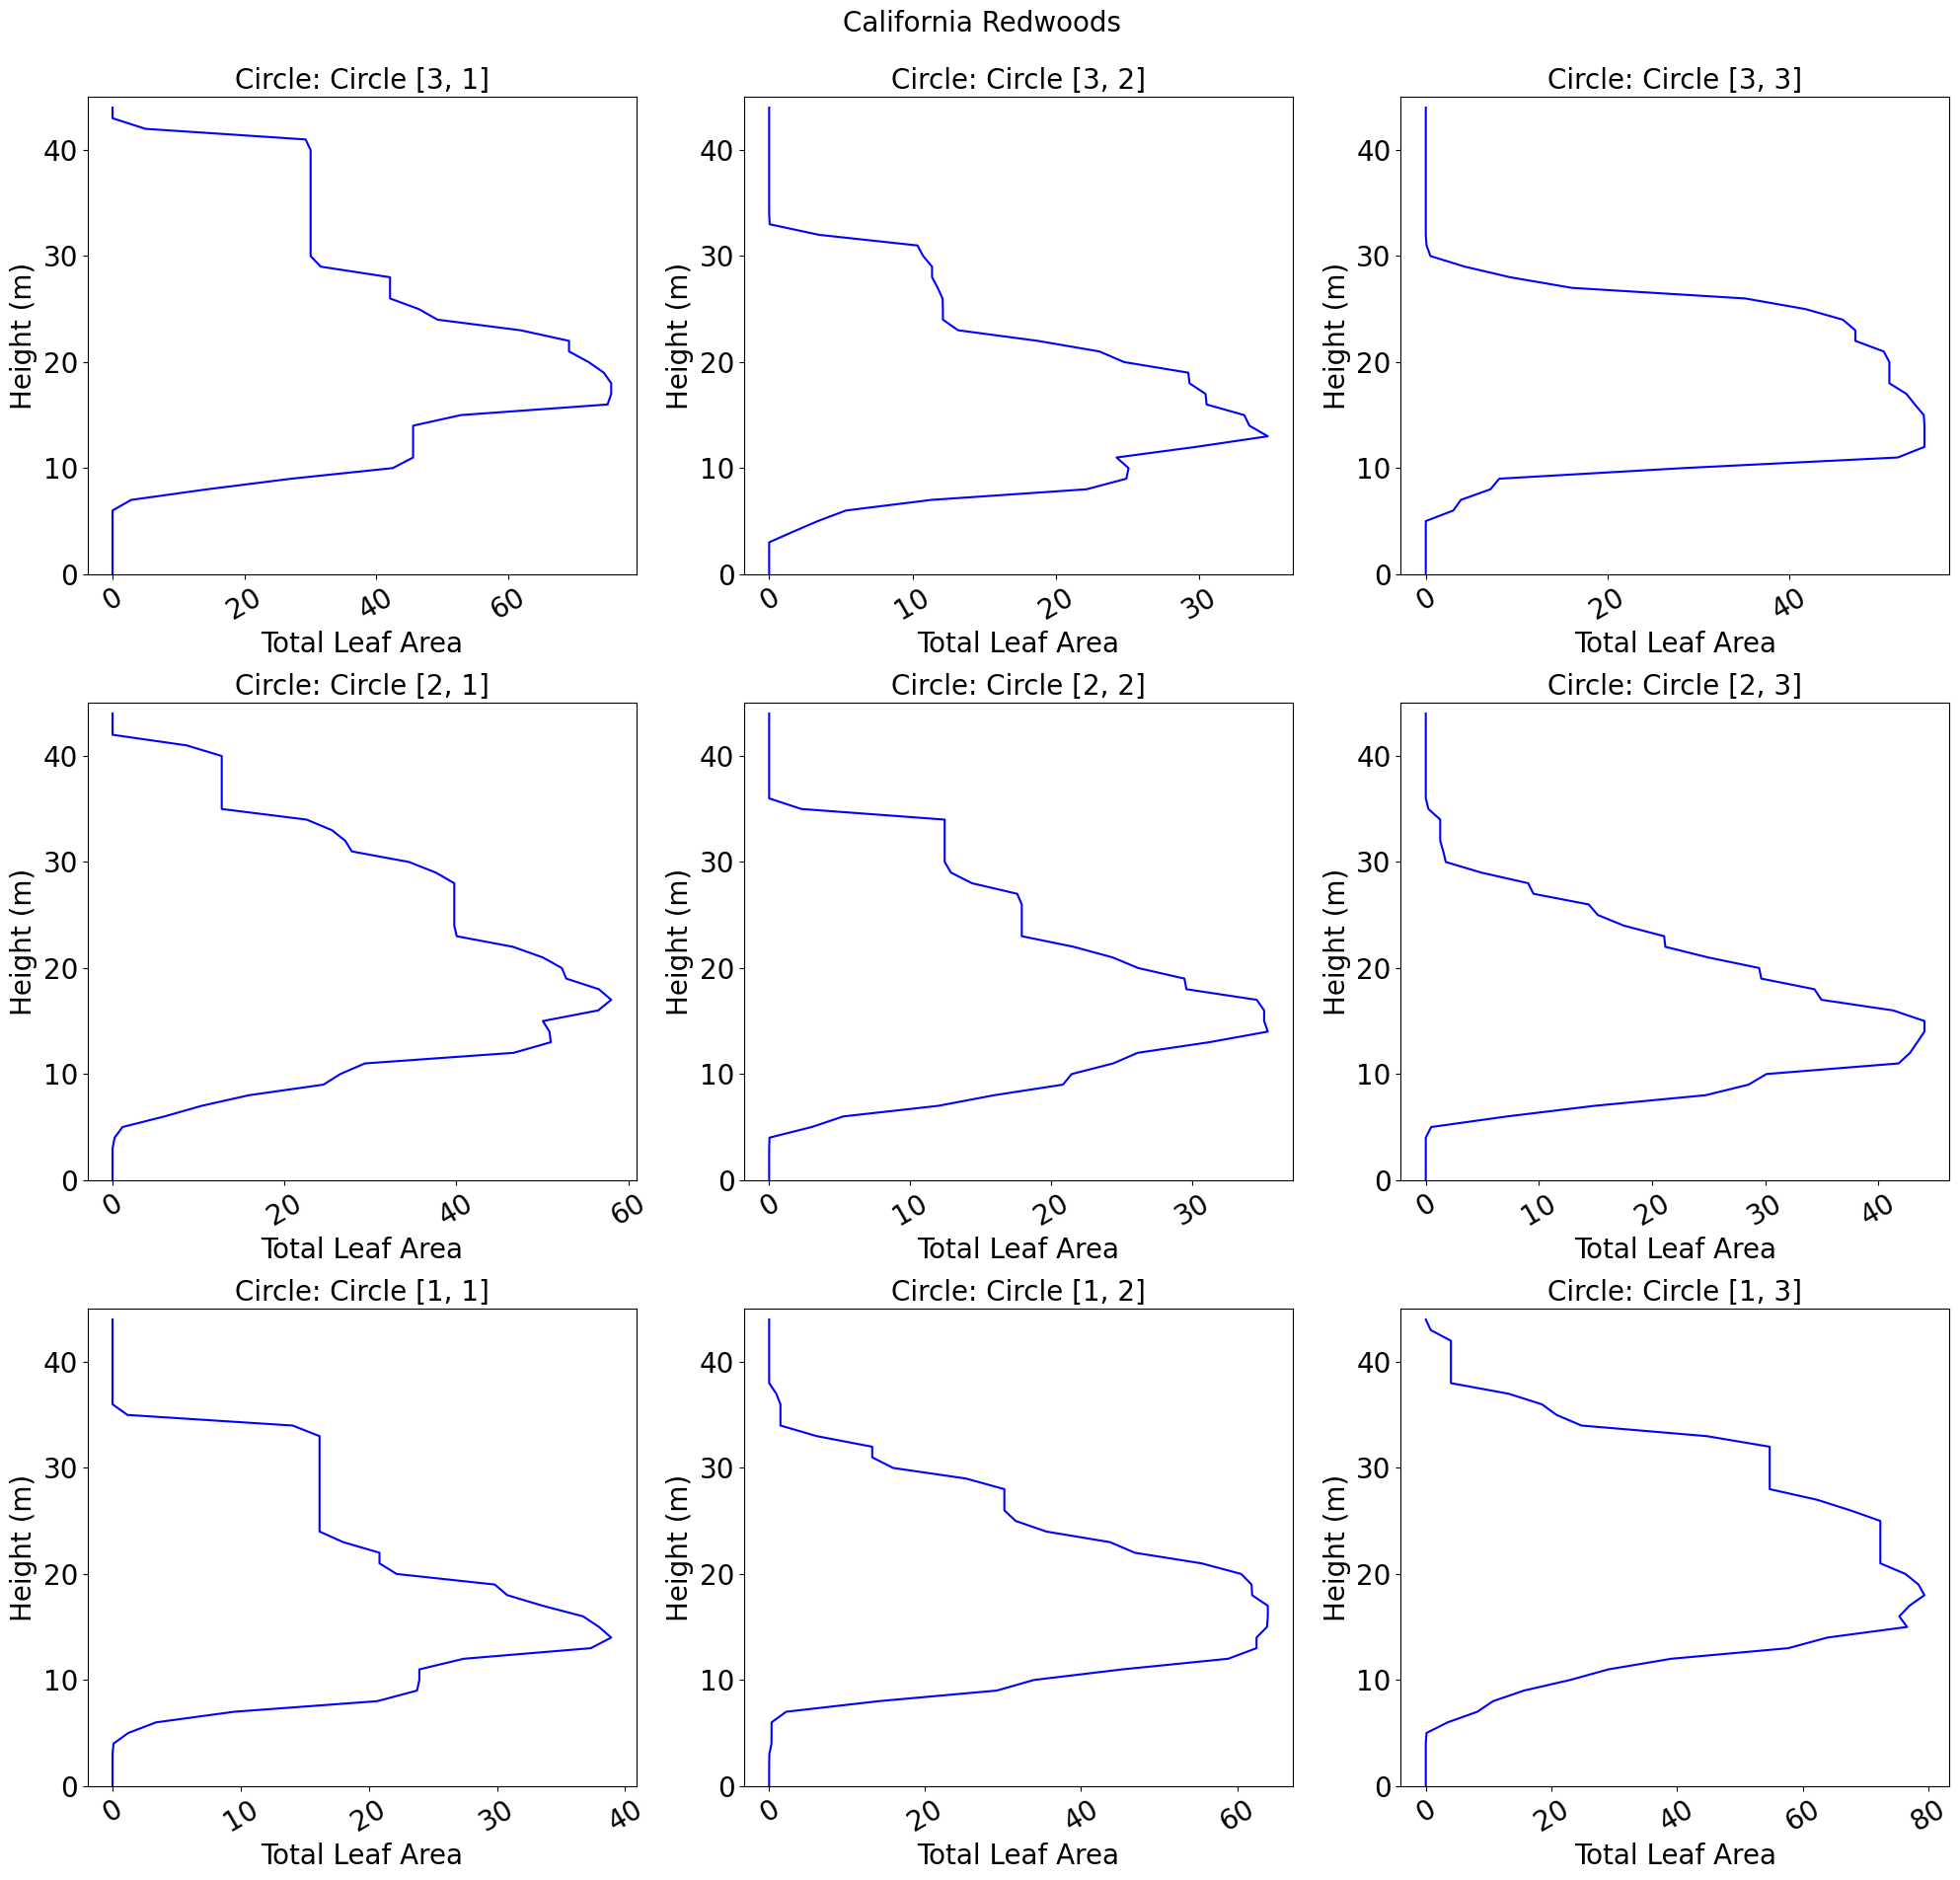

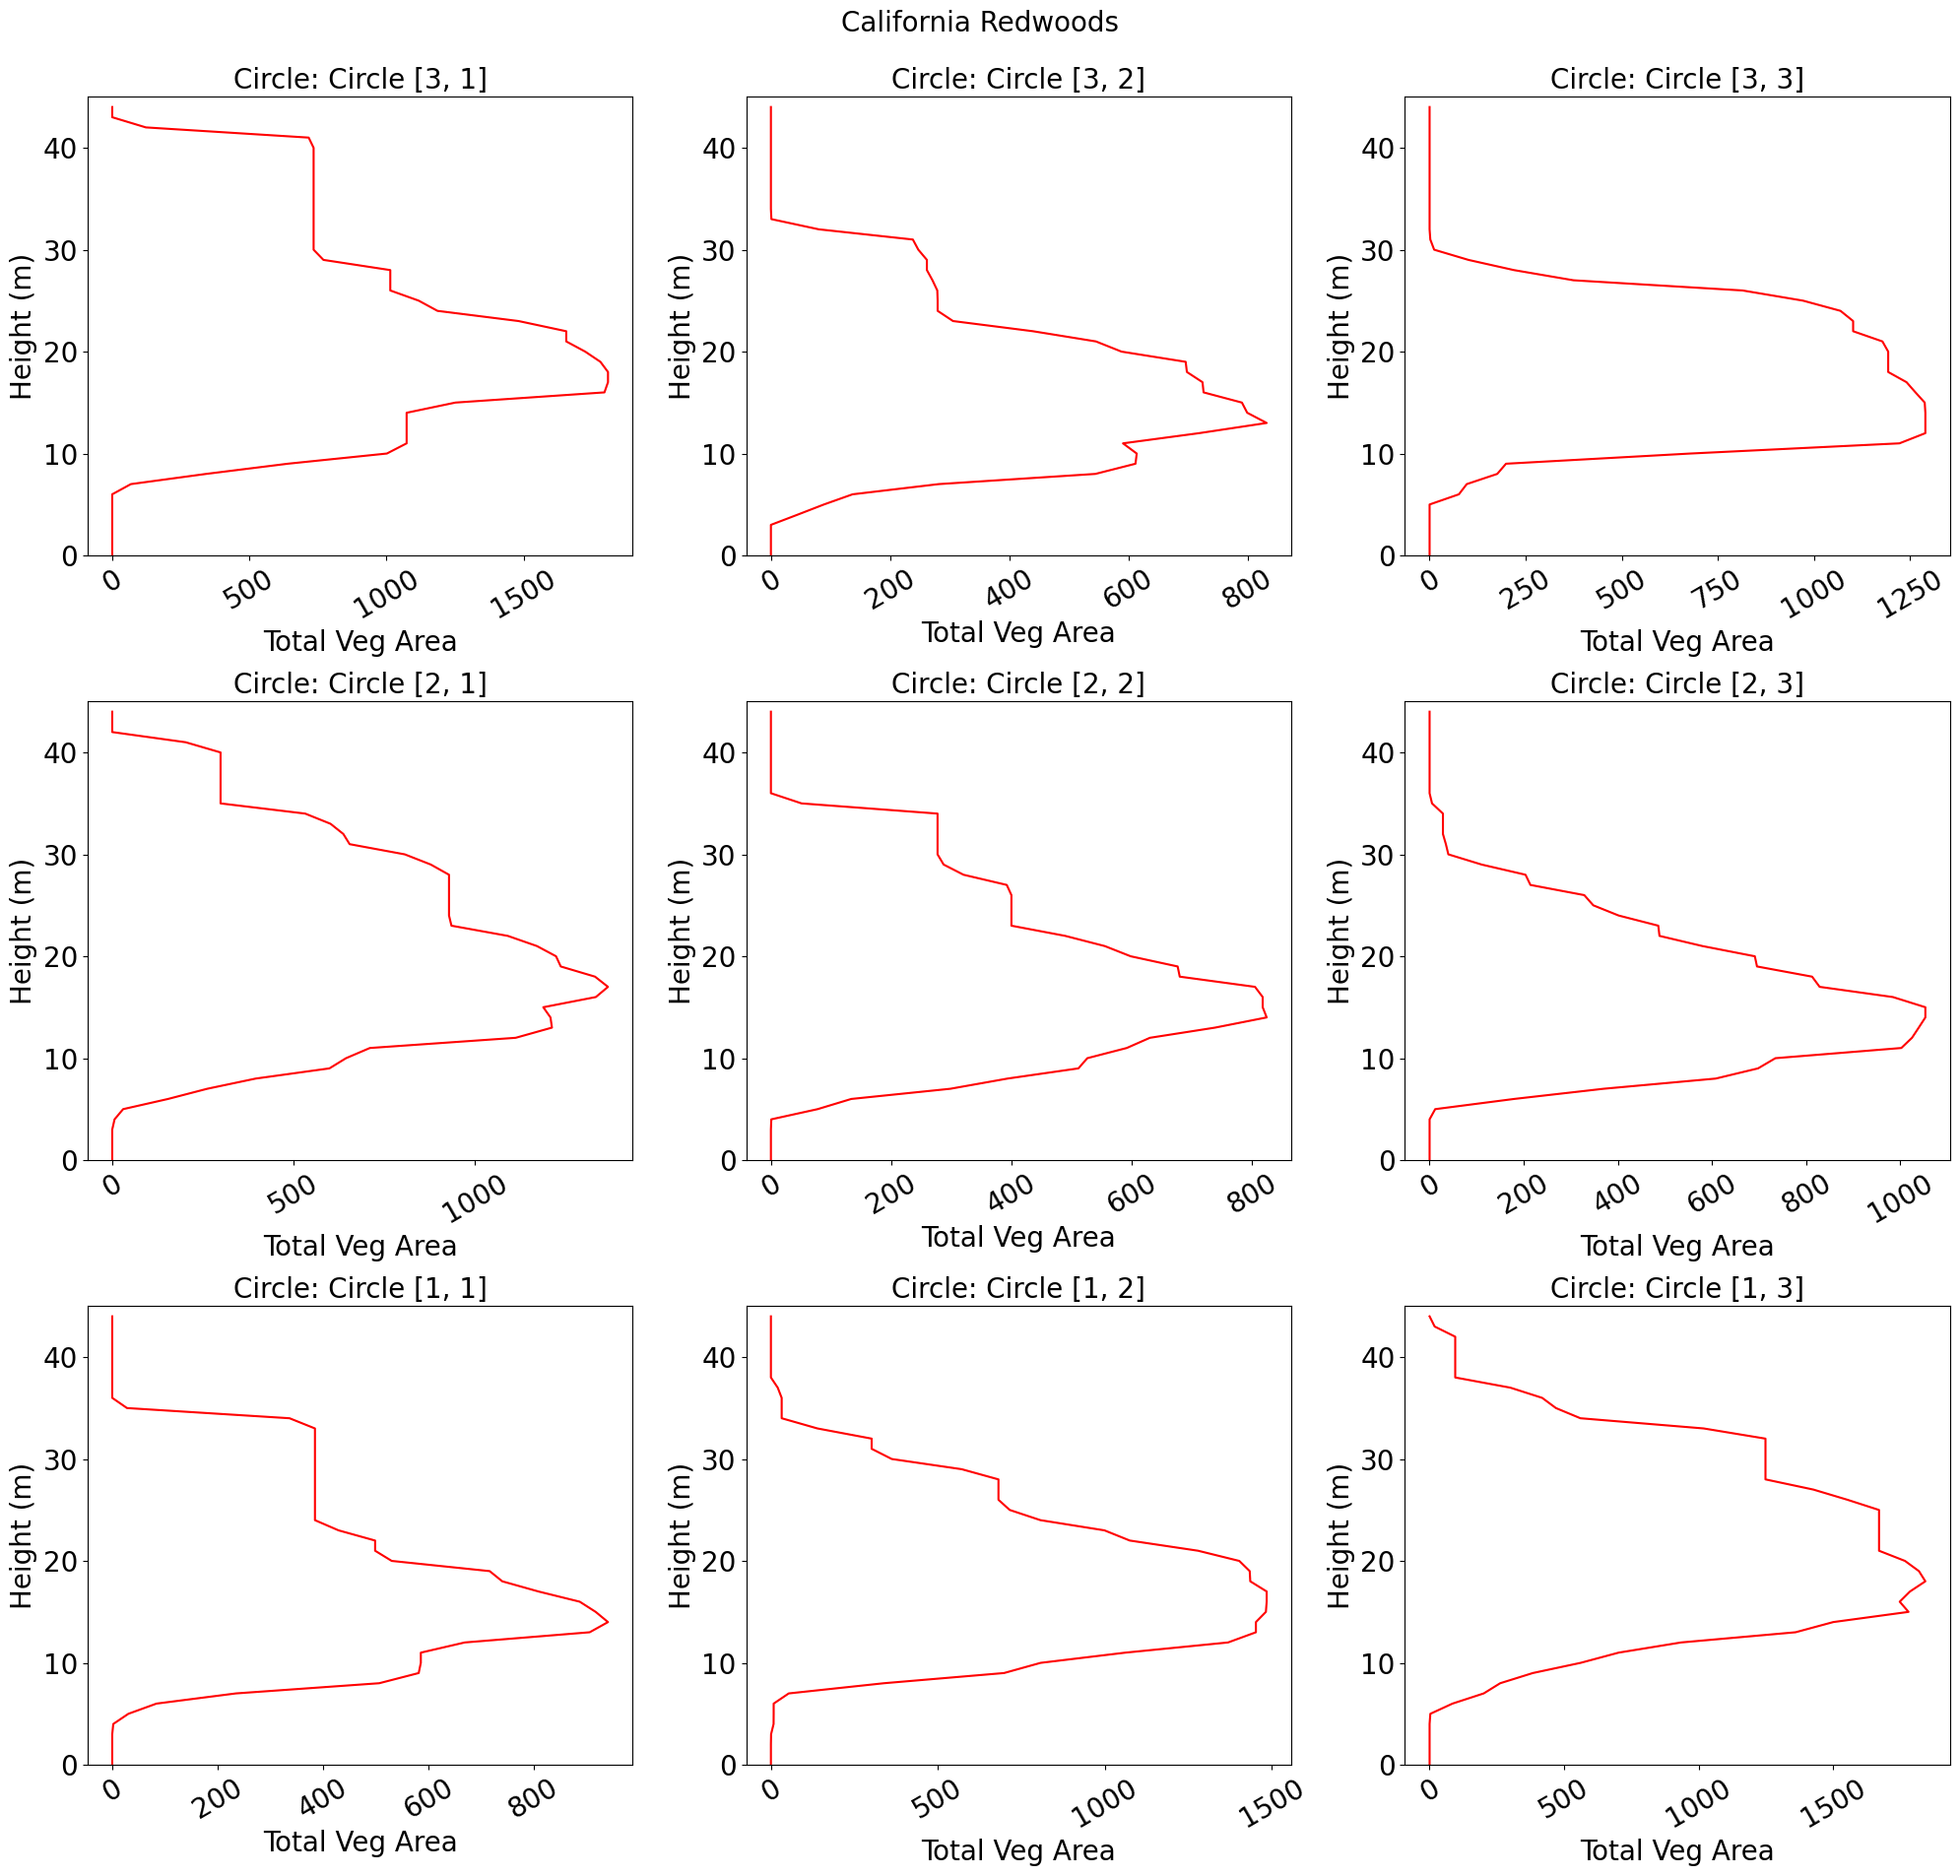

In [12]:
# Define circle_data_list
circle_data_list = []

# Populate circle_data_list with data for each circle
for circle_name, circle_data in redwood_circle_area_by_height.items():
    total_leaf_area_per_meter_range = circle_data['total_leaf_area_per_meter_range']
    total_veg_area_per_meter_range = circle_data['total_veg_area_per_meter_range']
    circle_data_list.append({
        'circle_name': circle_name,
        'total_leaf_area_per_meter_range': total_leaf_area_per_meter_range,
        'total_veg_area_per_meter_range': total_veg_area_per_meter_range
    })

# Plot total leaf area per meter for each circle
plot_circle_data_with_subplots(circle_data_list, 'leaf', 'California Redwoods', output_path, 'redwood')

# Plot total veg area per meter for each circle
plot_circle_data_with_subplots(circle_data_list, 'veg', 'California Redwoods', output_path, 'redwood')

In [13]:
redwood_tree_heights = [redwood_tree_data[tree_index]['tree_height'] for tree_index in redwood_tree_data]
redwood_cr_ct_heights = [redwood_tree_data[tree_index]['crown_center_height'] for tree_index in redwood_tree_data]
redwood_crown_heights = [redwood_tree_data[tree_index]['crown_d1'] for tree_index in redwood_tree_data]
redwood_crown_base_heights = [redwood_tree_data[tree_index]['crown_base_height'] for tree_index in redwood_tree_data]

for index, data in enumerate(redwood_tree_heights):
    print(f'Tree {index}: \n' + f'\tTree height is {redwood_tree_heights[index]},\n'
        + f'\tCrown Center Height is {redwood_cr_ct_heights[index]},\n'
        + f'\tCrown Height is {redwood_crown_heights[index]},\n'
        + f'\tCrown Base Height is {redwood_crown_base_heights[index]},\n'
        )

Tree 0: 
	Tree height is 16.01908,
	Crown Center Height is 11.26404,
	Crown Height is 4.75503,
	Crown Base Height is 6.50901,

Tree 1: 
	Tree height is 18.66553,
	Crown Center Height is 12.83156,
	Crown Height is 5.83397,
	Crown Base Height is 6.99759,

Tree 2: 
	Tree height is 21.73231,
	Crown Center Height is 15.26507,
	Crown Height is 6.46724,
	Crown Base Height is 8.79783,

Tree 3: 
	Tree height is 29.08902,
	Crown Center Height is 19.86305,
	Crown Height is 9.22597,
	Crown Base Height is 10.63708,

Tree 4: 
	Tree height is 18.67306,
	Crown Center Height is 12.80206,
	Crown Height is 5.871,
	Crown Base Height is 6.93106,

Tree 5: 
	Tree height is 14.96884,
	Crown Center Height is 10.32641,
	Crown Height is 4.64243,
	Crown Base Height is 5.68398,

Tree 6: 
	Tree height is 25.94412,
	Crown Center Height is 17.80083,
	Crown Height is 8.14329,
	Crown Base Height is 9.65754,

Tree 7: 
	Tree height is 21.97216,
	Crown Center Height is 15.09388,
	Crown Height is 6.87828,
	Crown Base Heigh

In [14]:
guiana_circle_area_by_height = populate_vegarea_by_height()

max_tree_height = find_max_tree_height(guiana_tree_data)
assign_indices(max_tree_height, guiana_circle_area_by_height, guiana_circle_indices)

for circle_name, data in guiana_circle_area_by_height.items():

    # Extract indices for the current circle
    tree_indices = data['tree_indices']

    for i, tree_index in enumerate(tree_indices):
        crown_percentage = data['crown_percentages'][i]
        calculate_leaf_area_per_meter(i, tree_index, crown_percentage, circle_name, guiana_tree_data, guiana_circle_area_by_height)

# Debugging output
for circle_name, data in guiana_circle_area_by_height.items():
    if circle_name == 'Circle [3, 1]':  # Limit to the first circle
        print(f"Circle: {circle_name}")
        tree_indices = data['tree_indices']  # Limit to first 2 trees
        leaf_area_per_meter_range = data['leaf_area_per_meter_range']
        veg_area_per_meter_range = data['veg_area_per_meter_range']
        
        for i, tree_index in enumerate(tree_indices):
            tree_data = guiana_tree_data[f"Tree [{tree_index}]"]
            crown_base_height = tree_data['crown_base_height']
            tree_height = tree_data['tree_height']
            crown_height = tree_height - crown_base_height

            print(f"Tree Index: {tree_index}")
            print(f"Crown Base Height: {crown_base_height}")
            print(f"Tree Height: {tree_height}")
            print(f"Crown Height: {crown_height}")
            print("Leaf Area Per Meter Range:", leaf_area_per_meter_range[i])
            print("Veg Area Per Meter Range:", veg_area_per_meter_range[i], "\n")

for circle_name, data in guiana_circle_area_by_height.items():
    leaf_area_per_meter_range = data['leaf_area_per_meter_range']
    veg_area_per_meter_range = data['veg_area_per_meter_range']
    
    total_leaf_area_per_meter_range = [sum(x) for x in zip(*leaf_area_per_meter_range)]
    total_veg_area_per_meter_range = [sum(x) for x in zip(*veg_area_per_meter_range)]
    
    data['total_leaf_area_per_meter_range'] = total_leaf_area_per_meter_range
    data['total_veg_area_per_meter_range'] = total_veg_area_per_meter_range

for circle_name, data in guiana_circle_area_by_height.items():
    print(f"\nCircle: {circle_name}")
    print("Total Leaf Area Per Meter Range:", data['total_leaf_area_per_meter_range'])
    print("Total Veg Area Per Meter Range:", data['total_veg_area_per_meter_range'])

Circle: Circle [3, 1]
Tree Index: 8
Crown Base Height: 10.85824
Tree Height: 17.76094
Crown Height: 6.902700000000001
Leaf Area Per Meter Range: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41.28780362327774, 291.2514363944543, 291.2514363944543, 291.2514363944543, 291.2514363944543, 291.2514363944543, 291.2514363944543, 221.62486800999648, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Veg Area Per Meter Range: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41.93226749834112, 295.7975980413461, 295.7975980413461, 295.7975980413461, 295.7975980413461, 295.7975980413461, 295.7975980413461, 225.0842242535823, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Tree Index: 12
Crown Base Height: 14.05914
Tree Height: 22.5193
Crown Height: 8.460160000000002
Leaf Area Per Meter Range: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 618.5324701640396, 657.411804268477, 657.411804268477, 657.411804268477, 657.411804268477, 657.411804268477, 657.411804268477, 657.411804268477, 341.3939499

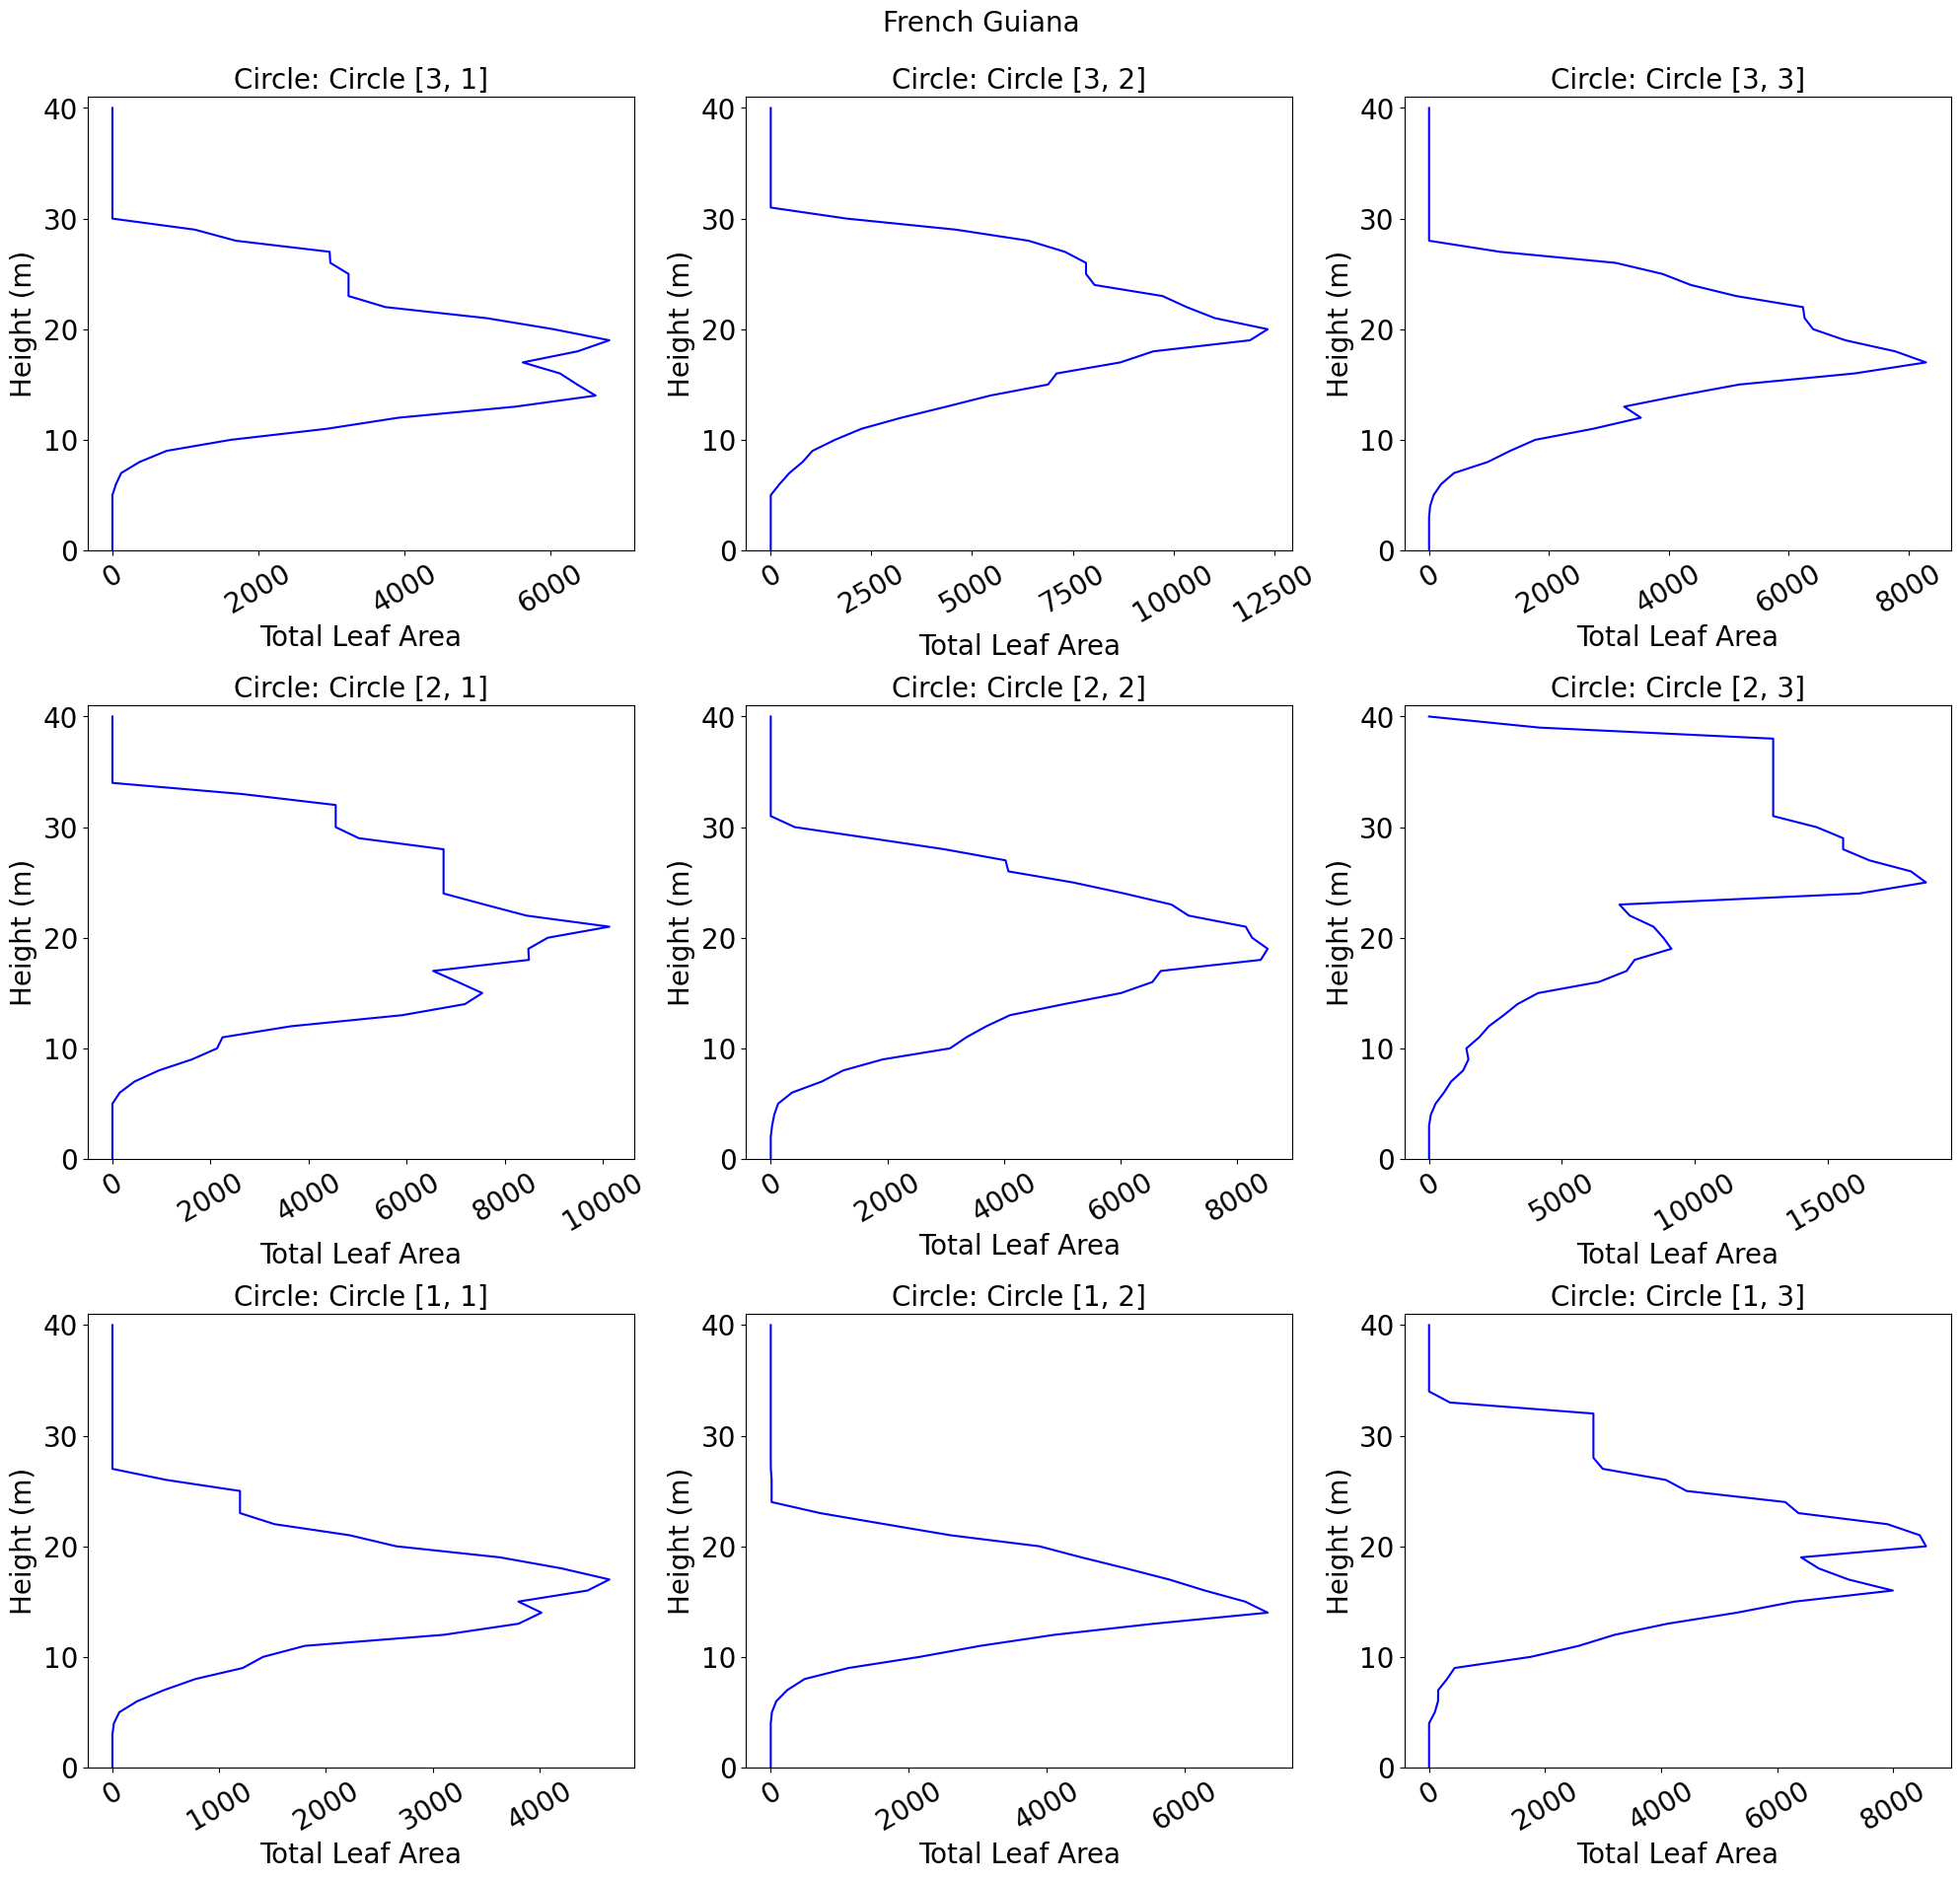

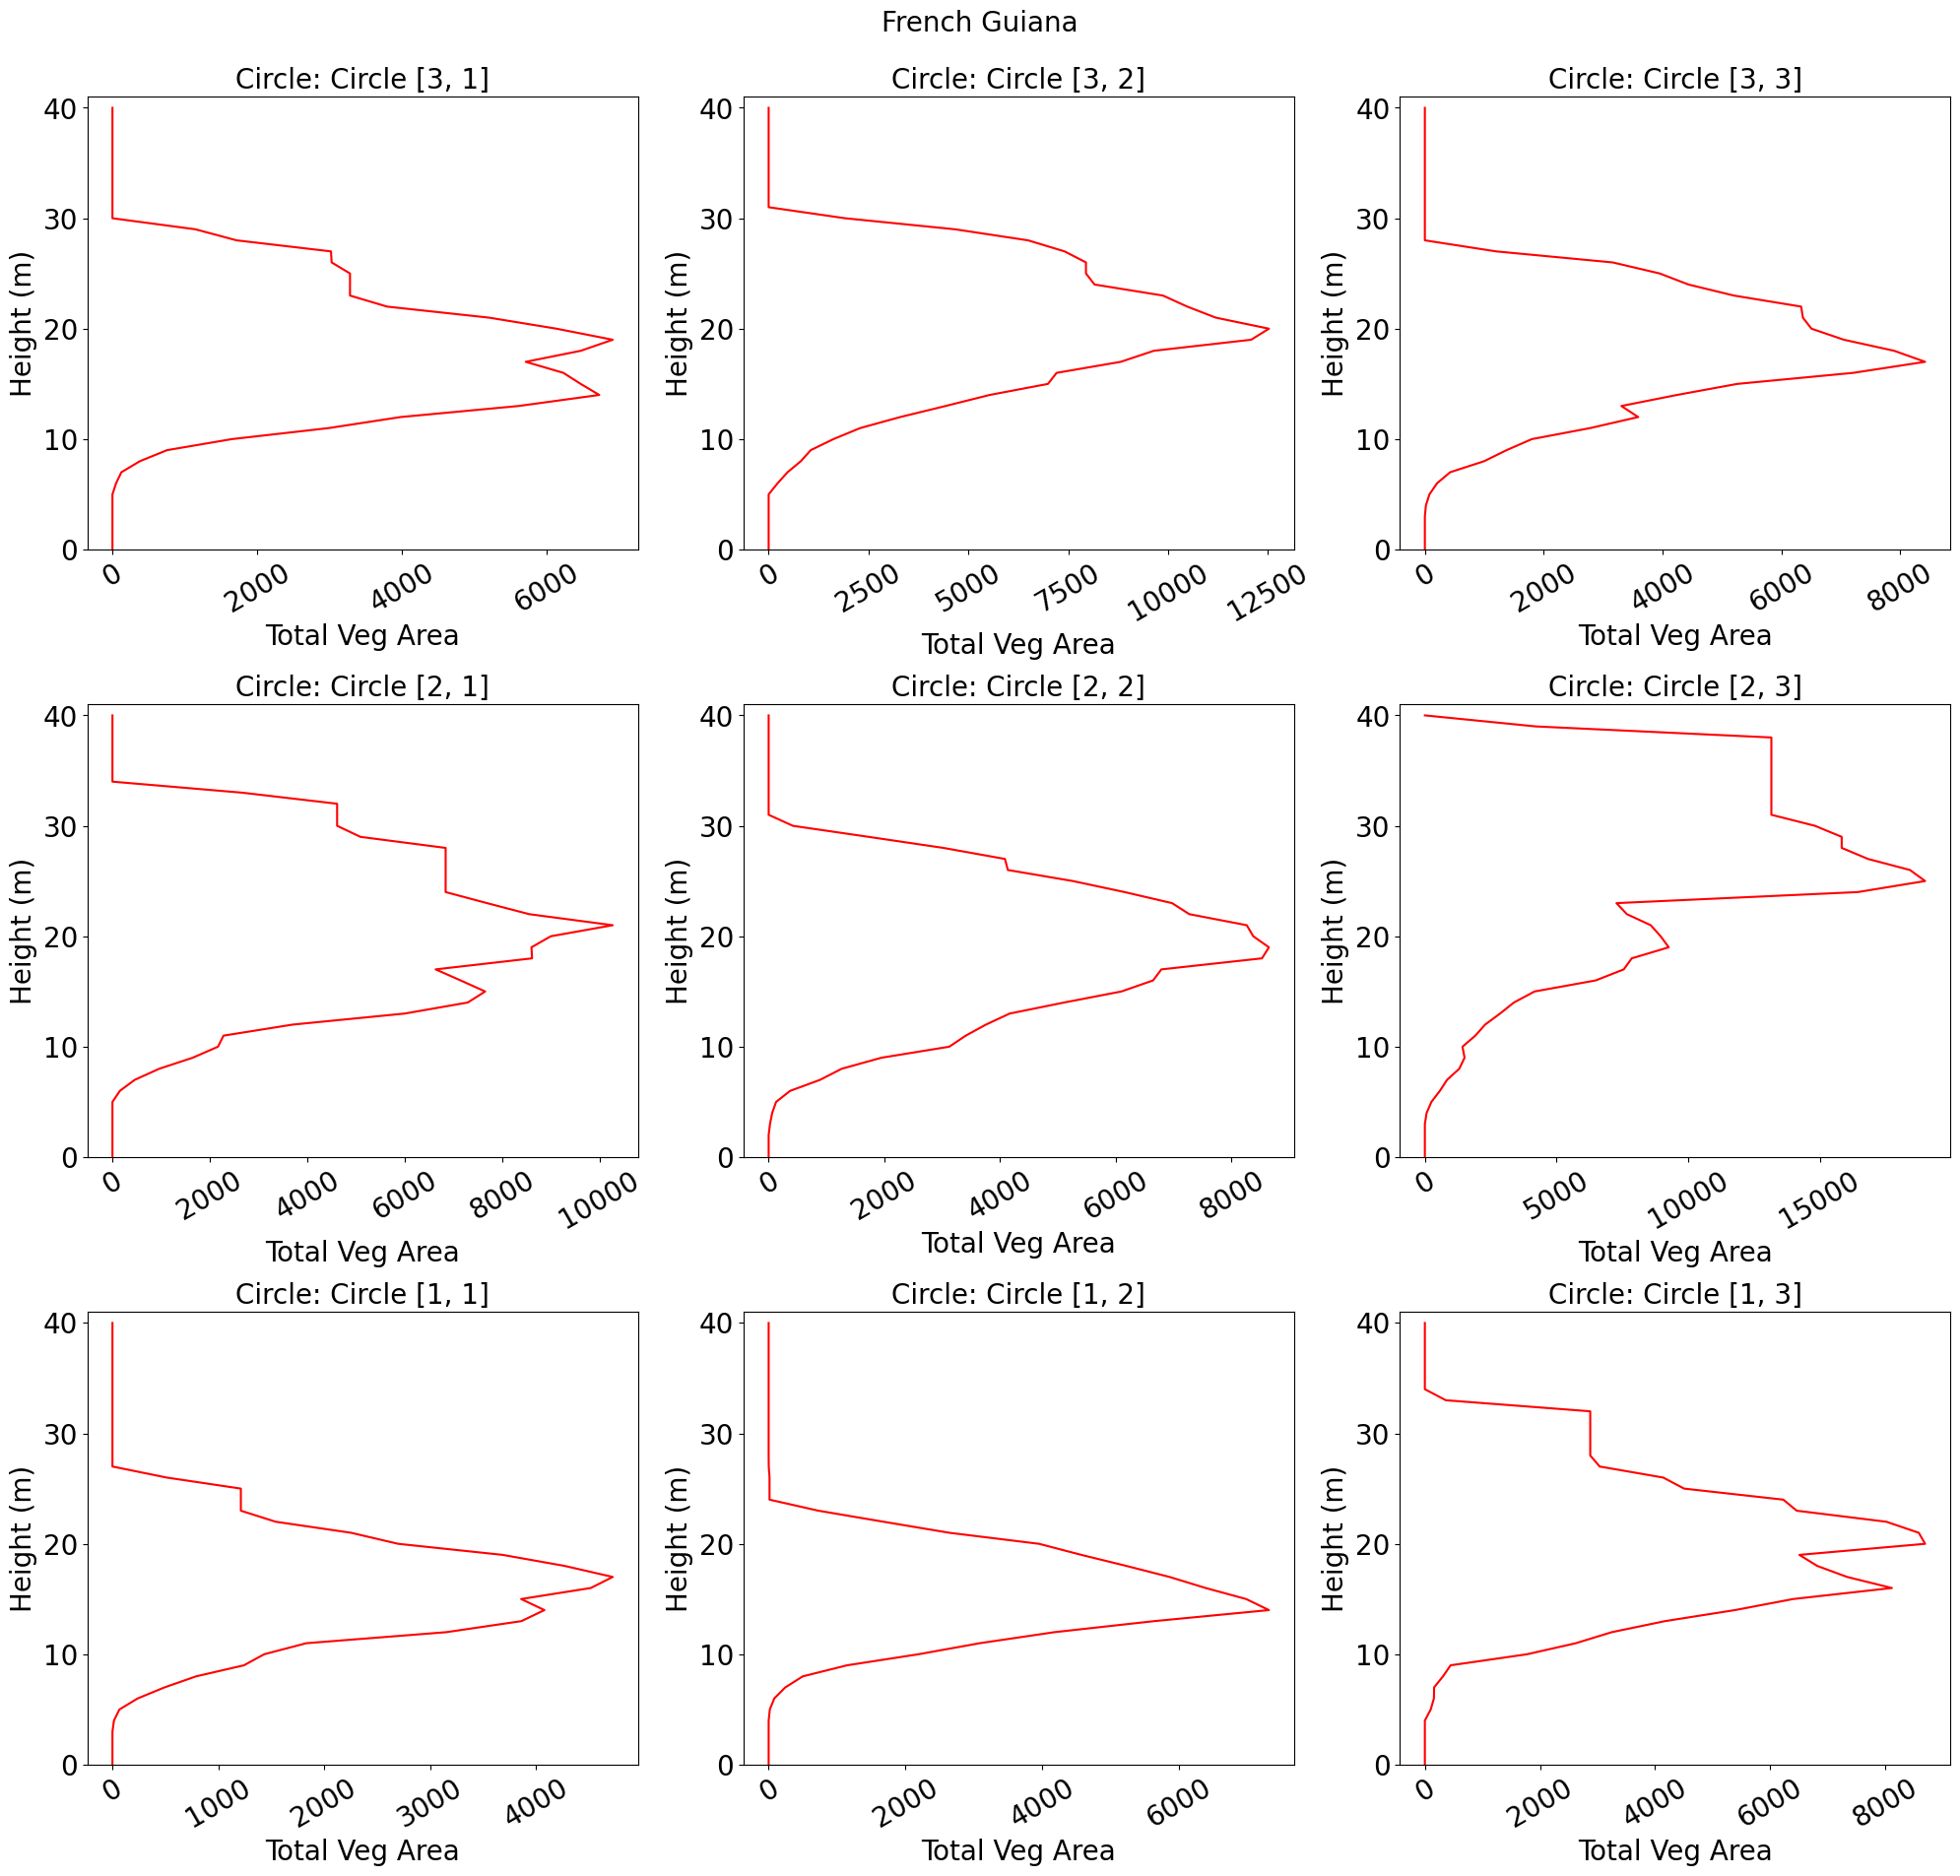

In [15]:
# Define circle_data_list
circle_data_list = []

# Populate circle_data_list with data for each circle
for circle_name, circle_data in guiana_circle_area_by_height.items():
    total_leaf_area_per_meter_range = circle_data['total_leaf_area_per_meter_range']
    total_veg_area_per_meter_range = circle_data['total_veg_area_per_meter_range']
    circle_data_list.append({
        'circle_name': circle_name,
        'total_leaf_area_per_meter_range': total_leaf_area_per_meter_range,
        'total_veg_area_per_meter_range': total_veg_area_per_meter_range
    })

# Plot total leaf area per meter for each circle
plot_circle_data_with_subplots(circle_data_list, 'leaf', 'French Guiana', output_path, 'guiana')

# Plot total veg area per meter for each circle
plot_circle_data_with_subplots(circle_data_list, 'veg', 'French Guiana', output_path, 'guiana')

In [20]:
import lidar_sim_class_declarations
import pickle
import os

def calc_gap_prob(circle_area_by_height, type):
    circle_pgap_objects = []
    for circle_name, data in circle_area_by_height.items():
        if type == "leaf":
            veg_area_per_meter_range = np.array(data['total_leaf_area_per_meter_range'])
        elif type == "branch":
            veg_area_per_meter_range = np.array(data['total_veg_area_per_meter_range'])
        else:
            raise ValueError("Invalid type. Supported types are 'leaf' and 'branch'.")

        pixel_area = data['pixel_area']
        meter_range = np.arange(1, len(veg_area_per_meter_range) + 1)
        Fa_array = veg_area_per_meter_range / pixel_area
        accumulated_veg_array = np.cumsum(veg_area_per_meter_range[::-1])[::-1]
        accumulated_lai_array = accumulated_veg_array / pixel_area
        total_gap_prob_array = np.exp(-accumulated_lai_array / 2)

        data['total_gap_probability'] = total_gap_prob_array

        # Create Circle_pgap object and assign values
        circle_pgap = lidar_sim_class_declarations.Circle_pgap(circle_name)
        circle_pgap.height_z = meter_range
        circle_pgap.Fa = Fa_array
        circle_pgap.accFa = accumulated_lai_array
        circle_pgap.p = total_gap_prob_array
        
        circle_pgap_objects.append(circle_pgap)

    return circle_pgap_objects

In [22]:
redwood_leaf_gap = calc_gap_prob(redwood_circle_area_by_height, "leaf")
redwood_branch_gap = calc_gap_prob(redwood_circle_area_by_height, "branch")


circle_name: Circle [3, 1]
height_z: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Fa: [0.         0.         0.         0.         0.         0.
 0.         0.00325472 0.01651438 0.03118211 0.04885016 0.05239375
 0.05239375 0.05239375 0.05239375 0.0607304  0.08628739 0.08692276
 0.08692276 0.08563184 0.08298467 0.07957205 0.07957205 0.07113343
 0.05664004 0.05337985 0.04837201 0.04837189 0.04837189 0.0362977
 0.034529   0.034529   0.034529   0.034529   0.034529   0.034529
 0.034529   0.034529   0.034529   0.034529   0.034529   0.03365492
 0.00575023 0.         0.        ]
accFa: [1.73979131 1.73979131 1.73979131 1.73979131 1.73979131 1.73979131
 1.73979131 1.73979131 1.73653659 1.72002221 1.6888401  1.63998994
 1.58759619 1.53520243 1.48280868 1.43041492 1.36968452 1.28339713
 1.19647437 1.10955161 1.02391977 0.9409351  0.86136305 0.781791
 0.71065757 0.65401753 0.60063768 0.55226567 0.50389378